In [1085]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### population data frame

In [1230]:
population=pd.DataFrame()

In [1231]:
import random

In [1232]:
x_number_list=[]

for i in range(0,300):
    num=random.randint(1,50)
    x_number_list.append(num)

In [1233]:
population["x"]= pd.Series(x_number_list)

In [1234]:
y_number_list=[]

for i in range(0,300):
    num=random.randint(1,50)
    y_number_list.append(num)

In [1235]:
population["y"]= pd.Series(y_number_list)

## initial positions of the population

<AxesSubplot:xlabel='x', ylabel='y'>

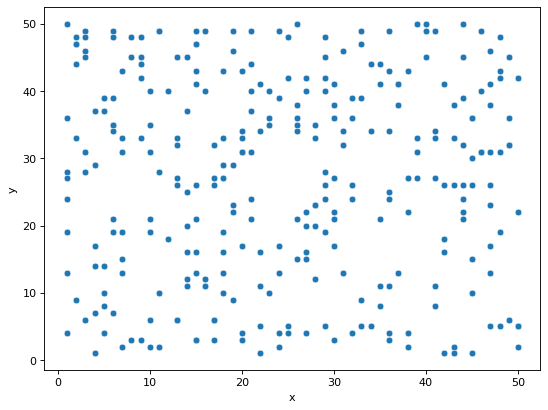

In [1236]:

figure(figsize=(8, 6), dpi=80)
sns.scatterplot(x=population["x"],y=population["y"])

In [1237]:
### include status to each person on the map, where all the population are humans in the initial stage

population["status"]='human'

In [1238]:
## now thw data frame looks as below
population.head()

,x,y,status
0,5,37,human
1,40,45,human
2,20,3,human
3,24,49,human
4,2,33,human


In [1239]:
from matplotlib.pyplot import figure


### now introduce a zombie in the plot

### introducing Zombie in the population

<AxesSubplot:xlabel='x', ylabel='y'>

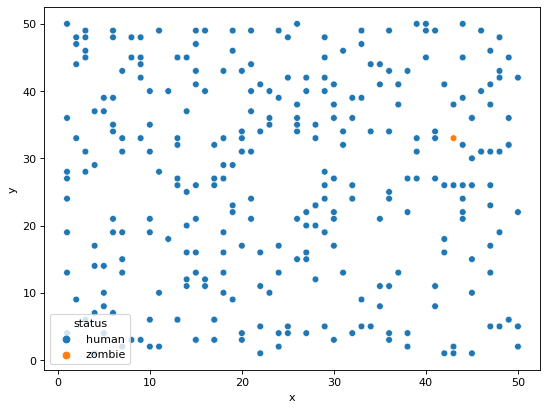

In [1240]:

x= population.sample(1)
index= x.index
population.at[index,"status"]="zombie"

## the plot after introducing zombie looks as below
figure(figsize=(8, 6), dpi=80)
sns.scatterplot(data=population,x="x",y="y",hue="status")

## applying random movements on the population

In [1241]:
def population_random_walk_1(n):
    for i in range(n):
        for a in population[population["status"]=="human"].index:
            population.loc[a,"x"]= population.loc[a,"x"]+np.random.choice([-1,1])
            population.loc[a,"y"]= population.loc[a,"y"]+np.random.choice([-1,1])
        
  

In [1242]:
population_random_walk_1(10)

<AxesSubplot:xlabel='x', ylabel='y'>

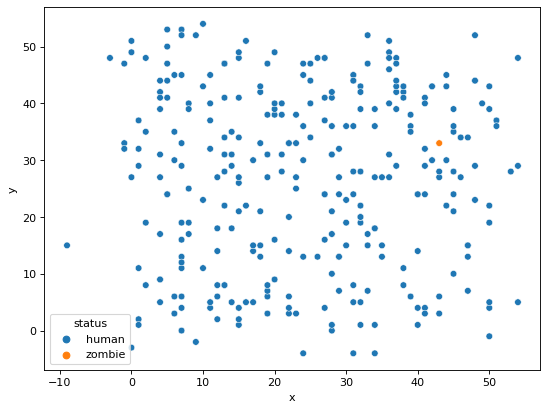

In [1243]:
figure(figsize=(8, 6), dpi=80)
sns.scatterplot(data=population,x="x",y="y",hue="status")

## applyinig random walk on zombies

In [1244]:
def zombie_random_walk_1(n):
    
    for i in range(n):
        for a in population[population["status"]=="zombie"].index:
            population.loc[a,"x"]= population.loc[a,"x"]+np.random.choice([-1,1])
            population.loc[a,"y"]= population.loc[a,"y"]+np.random.choice([-1,1])

In [1245]:

zombie_random_walk_1(10)

## the plot after introducing zombie looks as below

<AxesSubplot:xlabel='x', ylabel='y'>

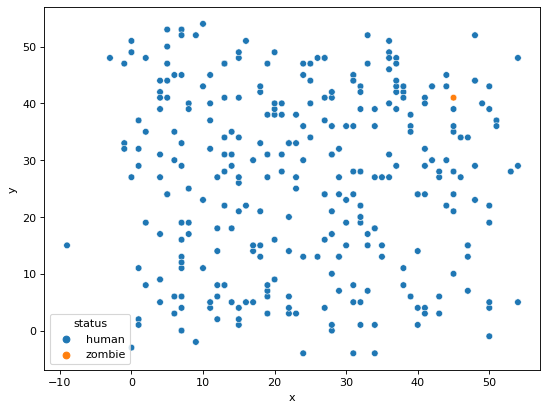

In [1246]:
figure(figsize=(8, 6), dpi=80)
sns.scatterplot(data=population,x="x",y="y",hue="status")

In [1248]:
## check on number of zombies and humans in the population
population["status"].value_counts()

human     299
zombie      1
Name: status, dtype: int64

## create zombie movement modification

In [1249]:
### create zombie movement modification - latest code

def spread_zombies(zom_speed,population_speed,zombie_spread):
    counter=0
    intervels = [x for x in zombie_spread]
    
    for a in intervels:
        while counter<=a:
            population_random_walk_1(population_speed)
            zombie_random_walk_1(zom_speed)
        
            for index2,rows2 in population[population["status"]=='zombie'].iterrows():
                for index1,rows1 in population[population["status"]=='human'].iterrows():
        
                    if rows2["x"]+1 == rows1["x"] and rows2["y"]+1 == rows1["y"]:
            
                        population.loc[(population["x"]==rows1["x"]) & (population["y"]==rows1["y"]),["status"]]="zombie"
                        counter=counter+1
        
                    if rows2["x"]+1 == rows1["x"] and rows2["y"] == rows1["y"]:
            
                        population.loc[(population["x"]==rows1["x"]) & (population["y"]==rows1["y"]),["status"]]="zombie"
                        counter=counter+1
            
                    if rows2["x"] == rows1["x"] and rows2["y"]+1 == rows1["y"]:
            
                        population.loc[(population["x"]==rows1["x"]) & (population["y"]==rows1["y"]),["status"]]="zombie"
                        counter=counter+1
            
                    if rows2["x"]-1 == rows1["x"] and rows2["y"]-1 == rows1["y"]:
            
                        population.loc[(population["x"]==rows1["x"]) & (population["y"]==rows1["y"]),["status"]]="zombie"
                        counter=counter+1
            
                    if rows2["x"]-1 == rows1["x"] and rows2["y"] == rows1["y"]:
            
                        population.loc[(population["x"]==rows1["x"]) & (population["y"]==rows1["y"]),["status"]]="zombie"
                        counter=counter+1
            
                    if rows2["x"] == rows1["x"] and rows2["y"]-1 == rows1["y"]:
            
                        population.loc[(population["x"]==rows1["x"]) & (population["y"]==rows1["y"]),["status"]]="zombie"
                        counter=counter+1
            
                    if rows2["x"]+1 == rows1["x"] and rows2["y"]-1 == rows1["y"]:
            
                        population.loc[(population["x"]==rows1["x"]) & (population["y"]==rows1["y"]),["status"]]="zombie"
                        counter=counter+1
            
                    if rows2["x"]-1 == rows1["x"] and rows2["y"]+1 == rows1["y"]:
            
                        population.loc[(population["x"]==rows1["x"]) & (population["y"]==rows1["y"]),["status"]]="zombie"
                        counter=counter+1
        plot_zombie_spread(counter)
            

enter population speed 1
enter zombie speed 1


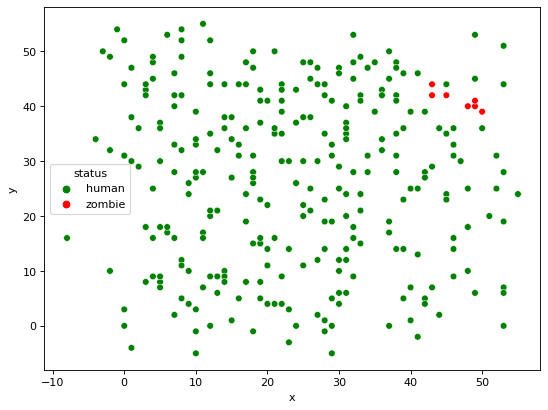

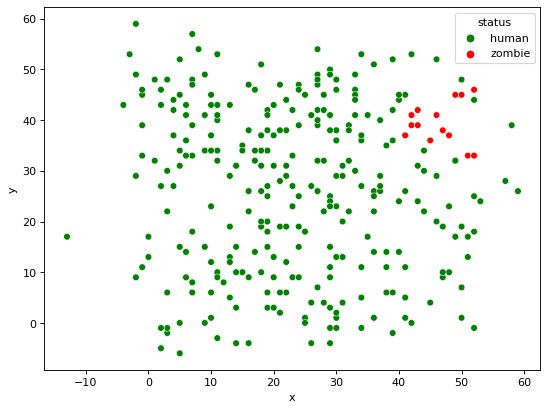

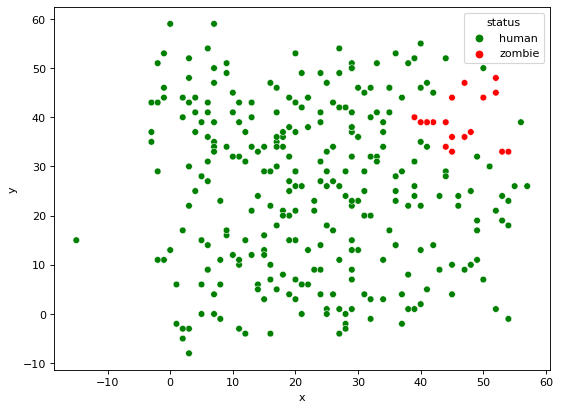

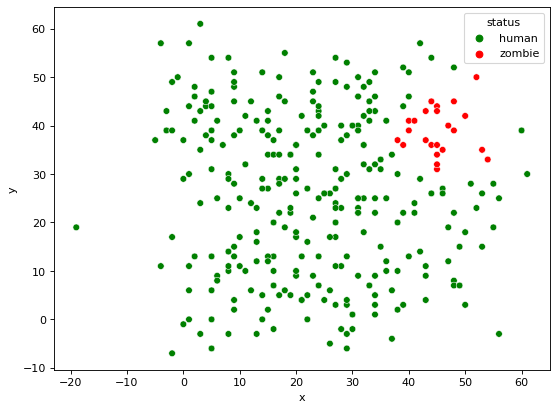

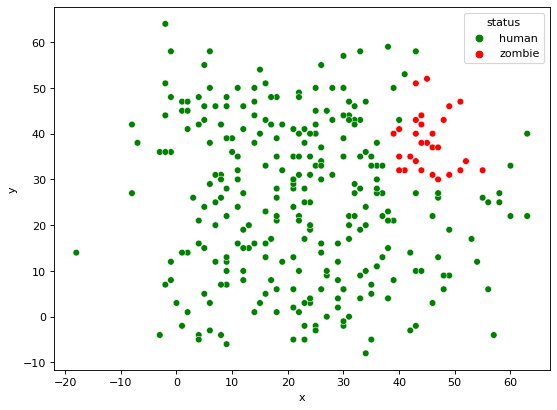

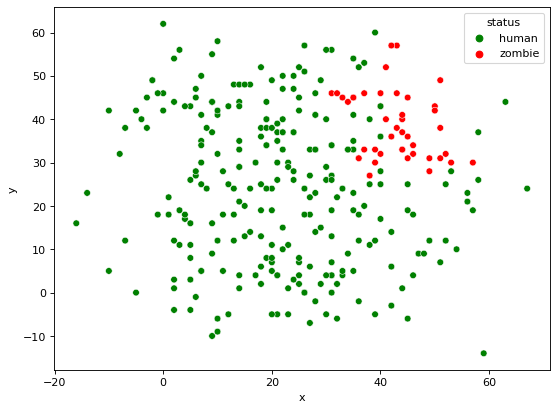

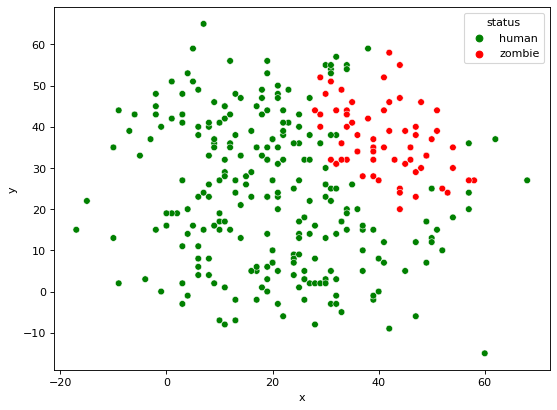

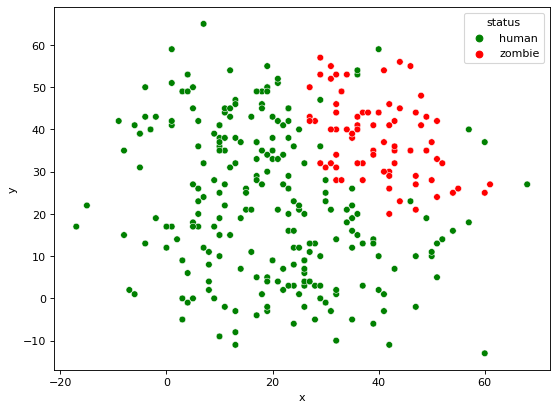

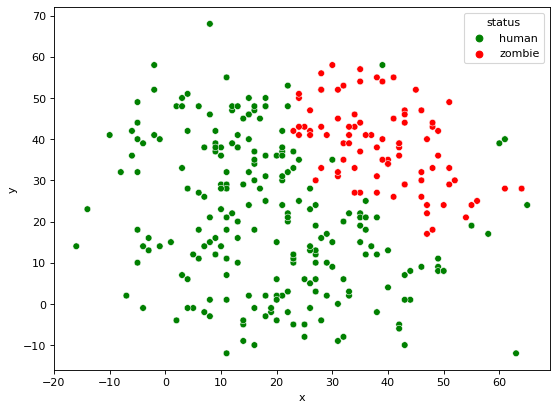

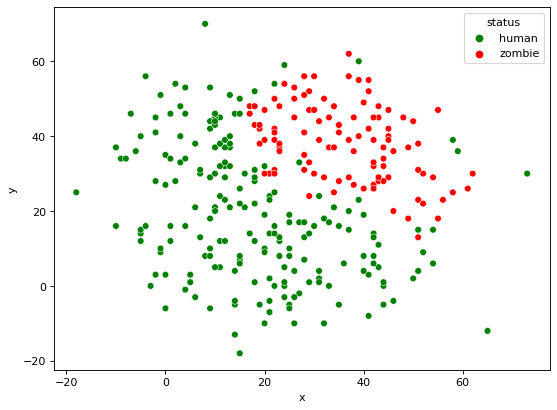

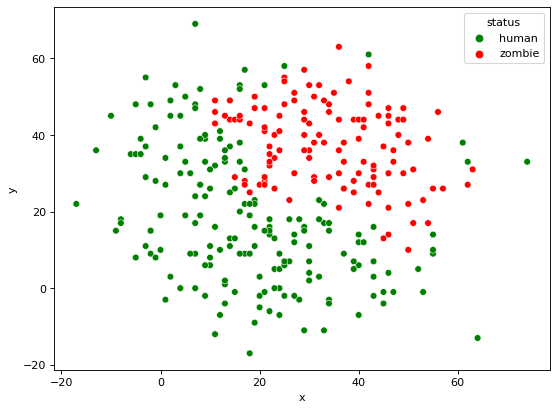

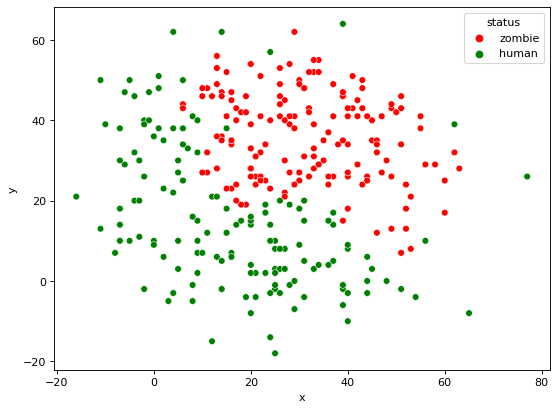

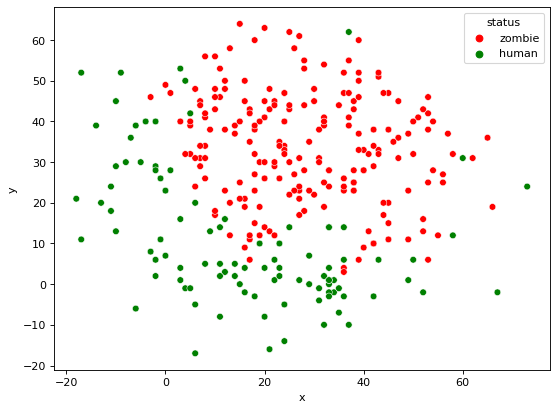

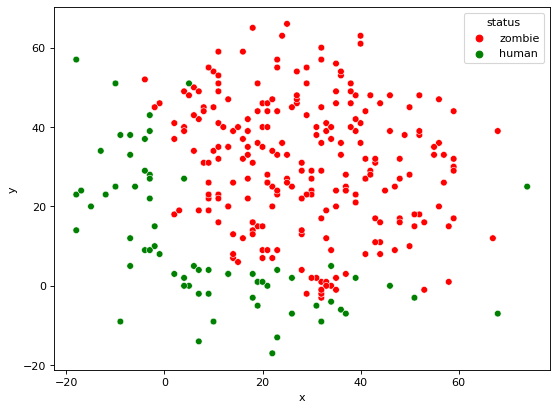

In [1250]:
population_speed= int(input("enter population speed"))
zombie_speed= int(input("enter zombie speed"))

zombie_spread_intervals=[5,10,15,20,25,40,60,70,80,100,120,150,200,230]


spread_zombies(zombie_speed,population_speed,zombie_spread_intervals )

In [1229]:
## the population after zombie spread looks as below
population["status"].value_counts()

zombie    234
human      66
Name: status, dtype: int64

In [1145]:
## the plot after introducing zombie looks as below

def plot_zombie_spread(counter=0):
    figure(figsize=(8, 6), dpi=80)
    palette ={"human": "green", "zombie": "red"}
    fig = sns.scatterplot(data=population,x="x",y="y",hue="status", palette=palette)
    fig.figure.savefig(f"spread{counter}.png")

### converting the above results into gif

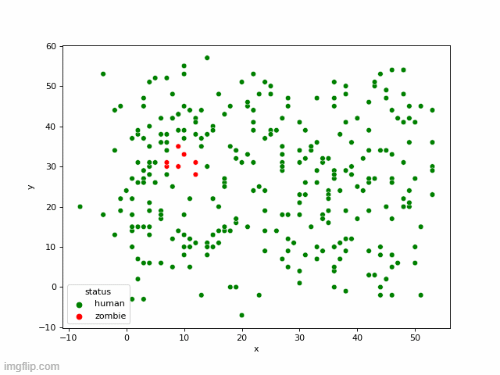

In [1226]:
from IPython.display import Image
Image(filename="zombie_spread.gif")

## introducing immunity to the population


Here I am adding an another column in the dataframe with immunity ranging from 0- 10 in random way

if immunity is greater than 7, the human will not get affected by the zombie even with the zombie bite

In [1220]:
immunity=[]

for i in range(0,100):
    num=random.randint(0,9)
    immunity.append(num)

In [1221]:
population["immunity"]=pd.Series(immunity)

In [1222]:
## the zombie spread model is modified as 

def spread_zombies_immunity(zom_speed,population_speed,zombie_spread):
    counter=0
    intervels = [x for x in zombie_spread]
    
    for a in intervels:
        while counter<=a:
            population_random_walk_1(population_speed)
            zombie_random_walk_1(zom_speed)
        
            for index2,rows2 in population[population["status"]=='zombie'].iterrows():
                for index1,rows1 in population[population["status"]=='human'].iterrows():
        
                    if rows2["x"]+1 == rows1["x"] and rows2["y"]+1 == rows1["y"] and rows1["immunity"]>7:
            
                        population.loc[(population["x"]==rows1["x"]) & (population["y"]==rows1["y"]),["status"]]="zombie"
                        counter=counter+1
        
                    if rows2["x"]+1 == rows1["x"] and rows2["y"] == rows1["y"] and rows1["immunity"]>7:
            
                        population.loc[(population["x"]==rows1["x"]) & (population["y"]==rows1["y"]),["status"]]="zombie"
                        counter=counter+1
            
                    if rows2["x"] == rows1["x"] and rows2["y"]+1 == rows1["y"]and rows1["immunity"]>7:
            
                        population.loc[(population["x"]==rows1["x"]) & (population["y"]==rows1["y"]),["status"]]="zombie"
                        counter=counter+1
            
                    if rows2["x"]-1 == rows1["x"] and rows2["y"]-1 == rows1["y"] and rows1["immunity"]>7:
            
                        population.loc[(population["x"]==rows1["x"]) & (population["y"]==rows1["y"]),["status"]]="zombie"
                        counter=counter+1
            
                    if rows2["x"]-1 == rows1["x"] and rows2["y"] == rows1["y"]:
            
                        population.loc[(population["x"]==rows1["x"]) & (population["y"]==rows1["y"]),["status"]]="zombie"
                        counter=counter+1
            
                    if rows2["x"] == rows1["x"] and rows2["y"]-1 == rows1["y"] and rows1["immunity"]>7:
            
                        population.loc[(population["x"]==rows1["x"]) & (population["y"]==rows1["y"]),["status"]]="zombie"
                        counter=counter+1
            
                    if rows2["x"]+1 == rows1["x"] and rows2["y"]-1 == rows1["y"] and rows1["immunity"]>7:
            
                        population.loc[(population["x"]==rows1["x"]) & (population["y"]==rows1["y"]),["status"]]="zombie"
                        counter=counter+1
            
                    if rows2["x"]-1 == rows1["x"] and rows2["y"]+1 == rows1["y"] and rows1["immunity"]>7:
            
                        population.loc[(population["x"]==rows1["x"]) & (population["y"]==rows1["y"]),["status"]]="zombie"
                        counter=counter+1
        plot_zombie_spread(counter)
            

enter population speed 1
enter zombie speed 1


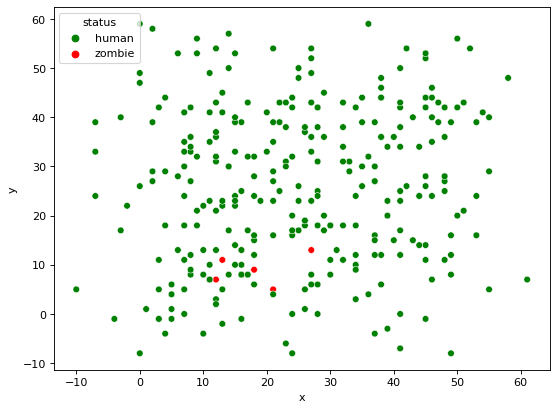

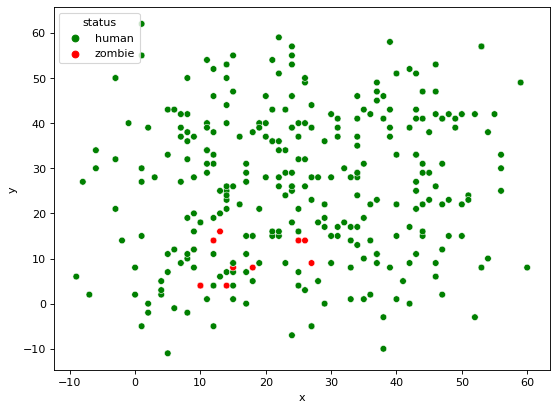

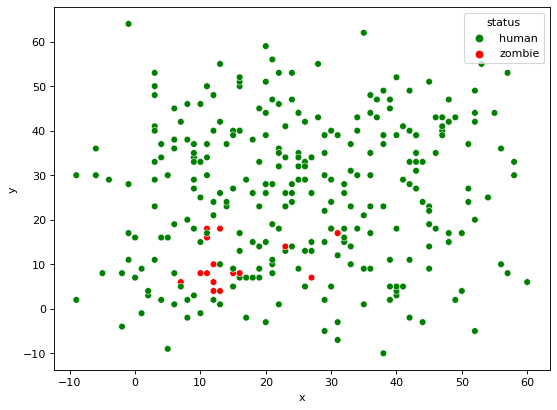

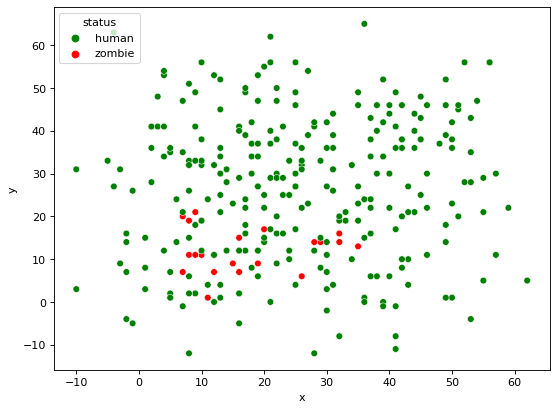

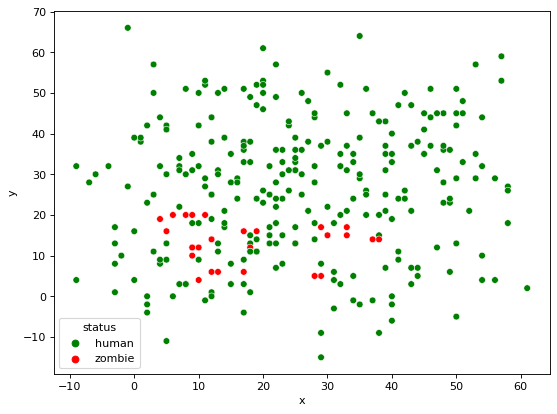

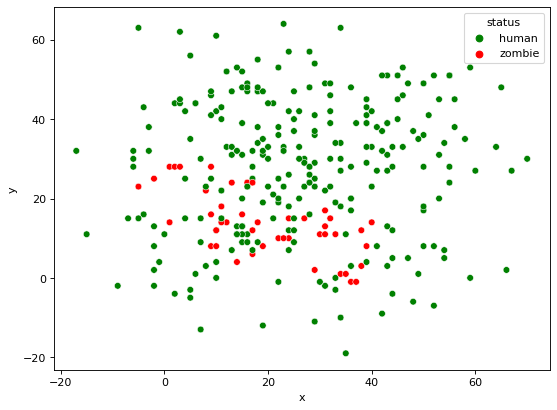

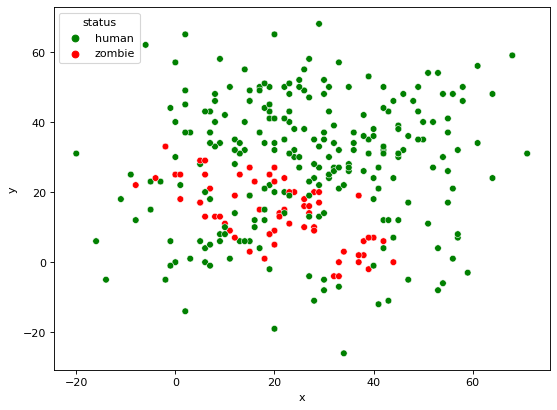

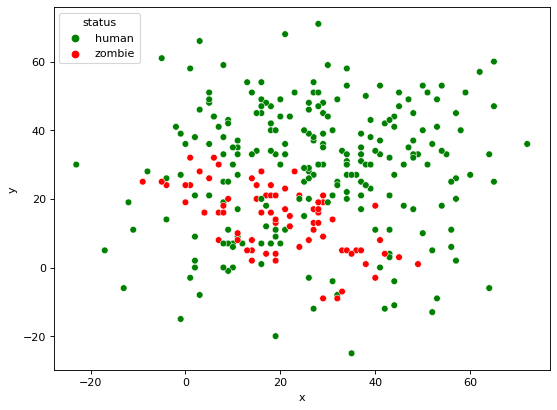

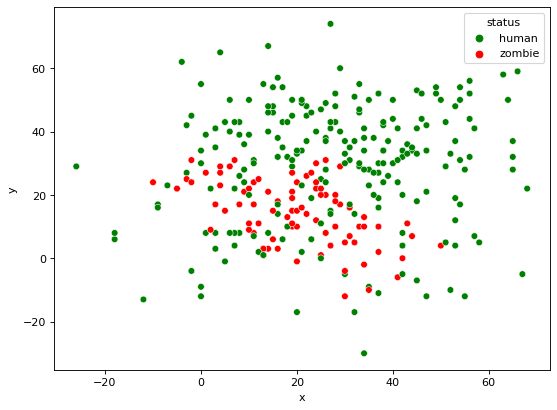

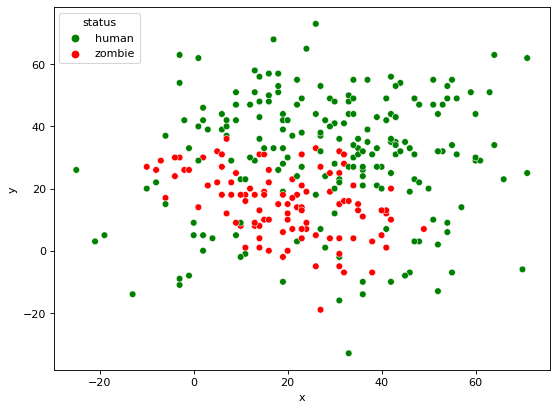

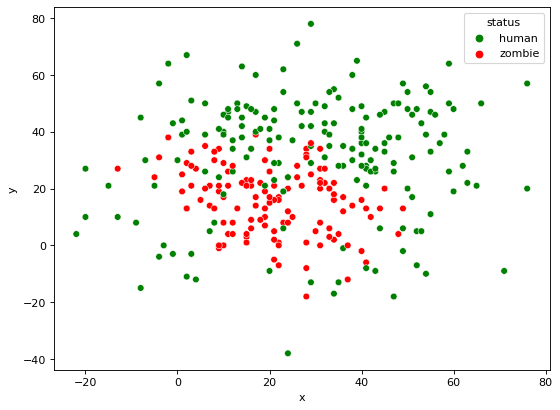

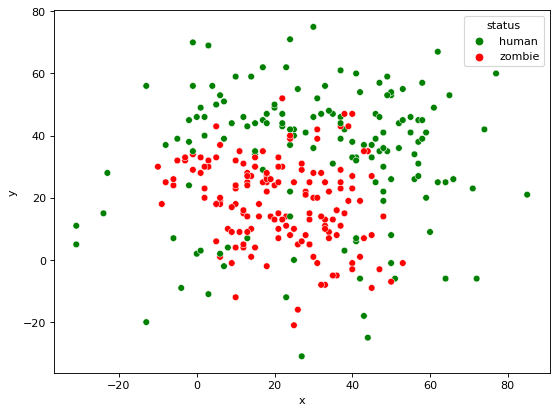

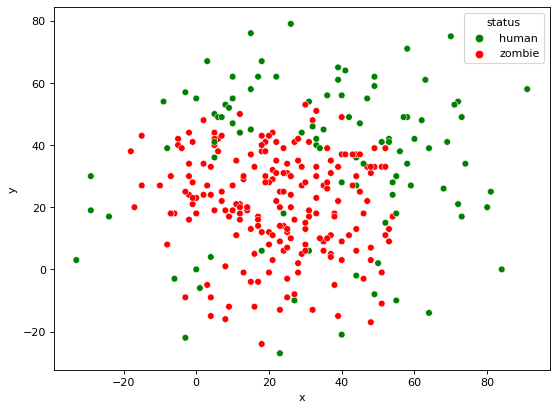

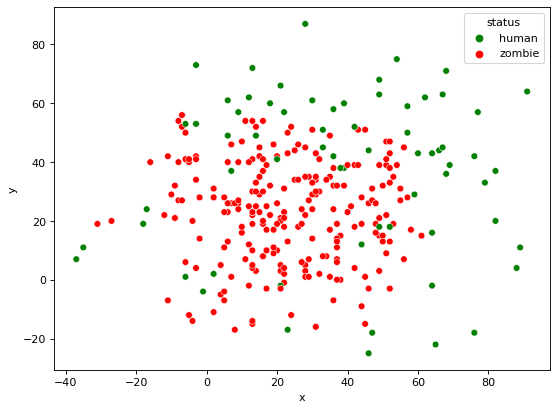

In [1223]:
population_speed= int(input("enter population speed"))
zombie_speed= int(input("enter zombie speed"))

zombie_spread_intervals=[5,10,15,20,25,40,60,70,80,100,120,150,200,230]


spread_zombies_immunity(zombie_speed,population_speed,zombie_spread_intervals )

### converting the above spread into gif

the gif is created by using the snapshots of frames and using the application https://imgflip.com/gif-maker

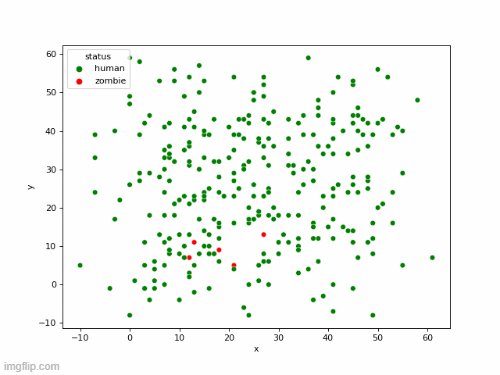

In [1228]:
from IPython.display import Image
Image(filename="zombie_spread_immunity.gif")